In [1]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.optimizers import SGD, Adadelta, Adam
from keras.layers import Input, Flatten, Dense, Dropout
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import math
import keras
portion_len = 10
mnist = tf.keras.datasets.mnist




Using TensorFlow backend.


In [2]:
class MODEL(object):
    def __init__(self,parameters_coef, width = 28, height = 28):
        self.width = width
        self.height = height
        self.parameters_coef = parameters_coef
        
        self.shape = (self.width, self.height)
        self.optimizer =  SGD(lr=0.01, momentum=0.9, decay=1e-8, nesterov=False)
        
        self.model = self.__model()
        self.model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    def __model(self):
        model = keras.models.Sequential([
          keras.layers.Flatten(input_shape = self.shape),
          keras.layers.Dense(math.floor(self.parameters_coef*512), activation='relu'),
          keras.layers.Dropout(0.2),
          keras.layers.Dense(10, activation='softmax')
        ])
        model.summary()
        
        return model
    
    
    def train(self, x_train, y_train, epochs = 10):
        callbacks = [
            keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=0)
            #ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0),
        ]
        history = self.model.fit(x_train, y_train, epochs=epochs, callbacks=callbacks)
        
        loss = history.history['loss']
        accuracy = history.history['acc']
        self.loss = loss
        self.acc = accuracy
        
    

In [3]:
if __name__ == '__main__':
    if tf.test.gpu_device_name():
        print('GPU found')
    else:
        print("No GPU found")
    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
#     y_train = np_utils.to_categorical(y_train, num_classes=10)
#     y_test = np_utils.to_categorical(y_test, num_classes=10)
    print(x_train.shape)
    print(y_train.shape)
    train_acc = []
    train_loss = []
    
    eval_acc = []
    eval_loss = []
    
    for i in range(portion_len):
        to_len = math.floor(len(x_train)*(i+1)/portion_len)
        my_mnist = MODEL(parameters_coef = (i+1))
        file_name = "MNIST_GENERALIZATION" + str(i) + ".h5"
        my_mnist.train(x_train, y_train)
        my_mnist.model.save(file_name)
        train_loss.append(my_mnist.loss)
        train_acc.append(my_mnist.acc)
        
        loss,acc = my_mnist.model.evaluate(x_test, y_test)
        eval_loss.append(loss)
        eval_acc.append(acc)
        


GPU found
(60000, 28, 28)
(60000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2170 - acc: 0.9360
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0962 - acc: 0.9702
Epoch 3/10
60000/60000 [=========

Epoch 1/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1890 - acc: 0.9418
Epoch 2/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0885 - acc: 0.9722
Epoch 3/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0640 - acc: 0.9792
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0524 - acc: 0.9837
Epoch 5/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0417 - acc: 0.9867
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0362 - acc: 0.9884
Epoch 7/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0323 - acc: 0.9898
Epoch 8/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0291 - acc: 0.9910
Epoch 9/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0295 - acc: 0.9909
Epoch 10/10
10000/10000 [==============================] - 0s 26us/step
___________________

60000/60000 [==============================] - 11s 188us/step - loss: 0.0482 - acc: 0.9856
Epoch 6/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0376 - acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0376 - acc: 0.9884
Epoch 8/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0371 - acc: 0.9896
Epoch 9/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0315 - acc: 0.9913
Epoch 10/10
10000/10000 [==============================] - 0s 41us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 5120)              4019200   
_________________________________________________________________
dropout_10 (Dropout)         (None

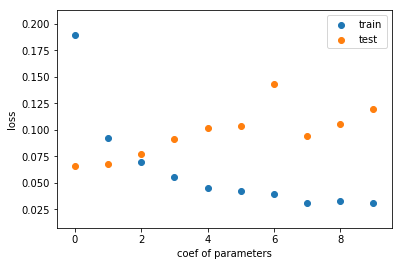

<Figure size 432x288 with 0 Axes>

In [10]:
    plt.scatter(np.arange(portion_len) ,train_loss[-1], label='train')
    plt.scatter(np.arange(portion_len) ,eval_loss, label='test')

    plt.legend(loc='upper right')
    plt.xlabel('coef of parameters')
    plt.ylabel('loss')
    plt.show()
    plt.savefig('MNIST_GENERALIZATION_LOSS.png')
    np.save("MNIST_GENERALIZATION_TRAIN_LOSS",np.array(train_loss))
    np.save("MNIST_GENERALIZATION_TEST_LOSS",np.array(eval_loss))

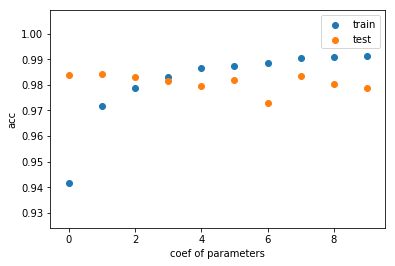

<Figure size 432x288 with 0 Axes>

In [12]:
    plt.scatter(np.arange(portion_len) ,train_acc[-1], label='train')
    plt.scatter(np.arange(portion_len) ,eval_acc, label='test')
    np.save("MNIST_GENERALIZATION_TRAIN_ACC",np.array(train_acc))
    np.save("MNIST_GENERALIZATION_TEST_ACC",np.array(eval_acc))
    plt.legend(loc='upper right')
    plt.xlabel('coef of parameters')
    plt.ylabel('acc')
    plt.show()
    plt.savefig('MNIST_GENERALIZATION_ACC.png')